In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from random import randint
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [50]:
df = pd.read_csv('/content/breast-cancer.csv')

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
print("Breast Cancer dataset:\n",df.shape[0],"Records\n",df.shape[1],"Features")

Breast Cancer dataset:
 569 Records
 32 Features


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [54]:
df.drop(['id'], axis=1, inplace = True)

In [55]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [56]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [57]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [58]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [59]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


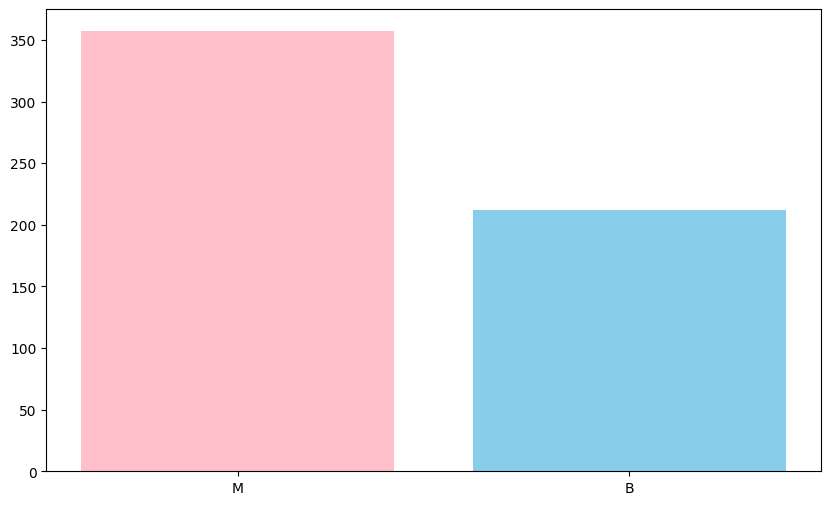

In [60]:
diagnosis_counts = df['diagnosis'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(diagnosis_counts.index, diagnosis_counts.values, color=['pink', 'skyblue'])
plt.xlabel('')
plt.ylabel('')
plt.xticks([0 ,1 ], ['M', 'B'])

plt.show()

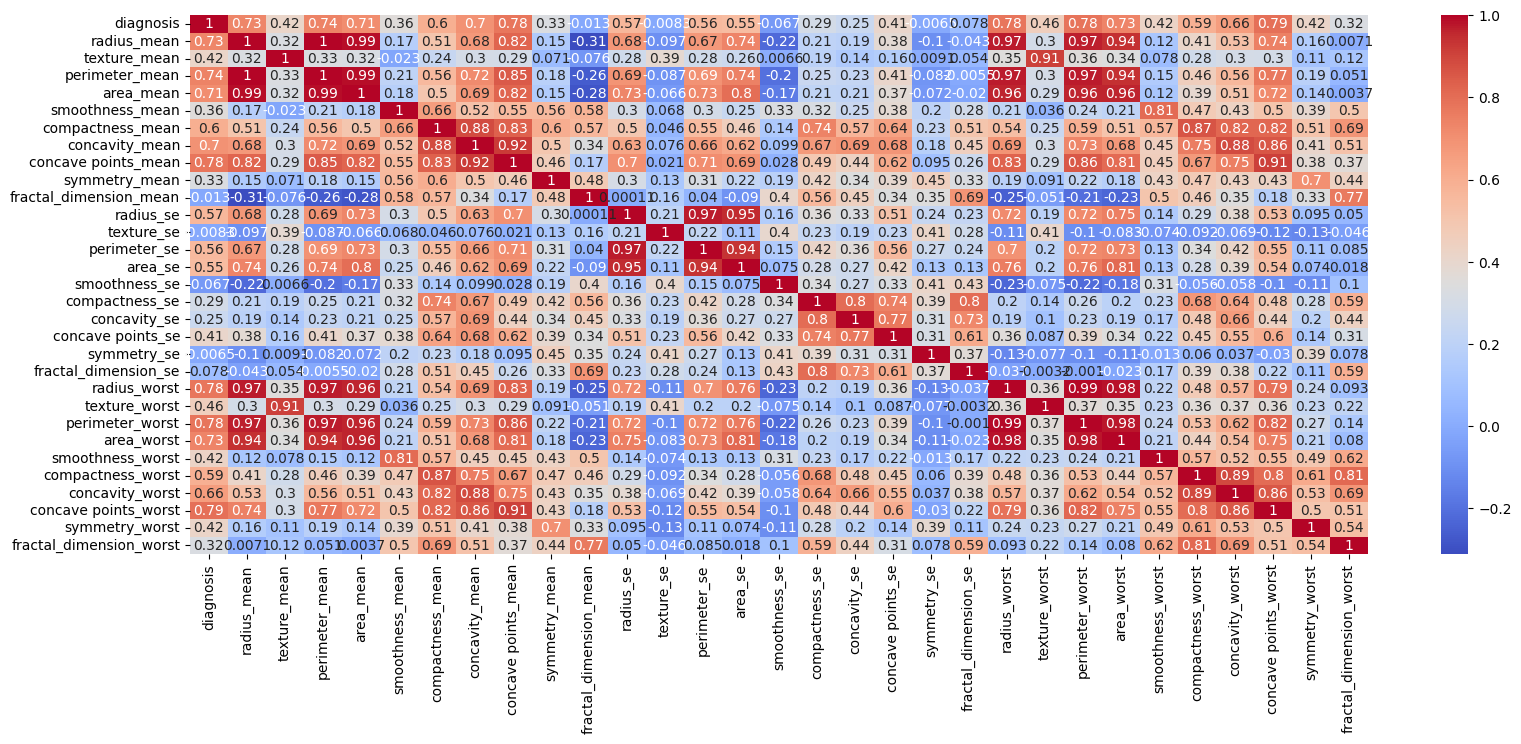

In [61]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(19,7))
sns.heatmap(corr, annot=True, cmap='coolwarm')

plt.show()

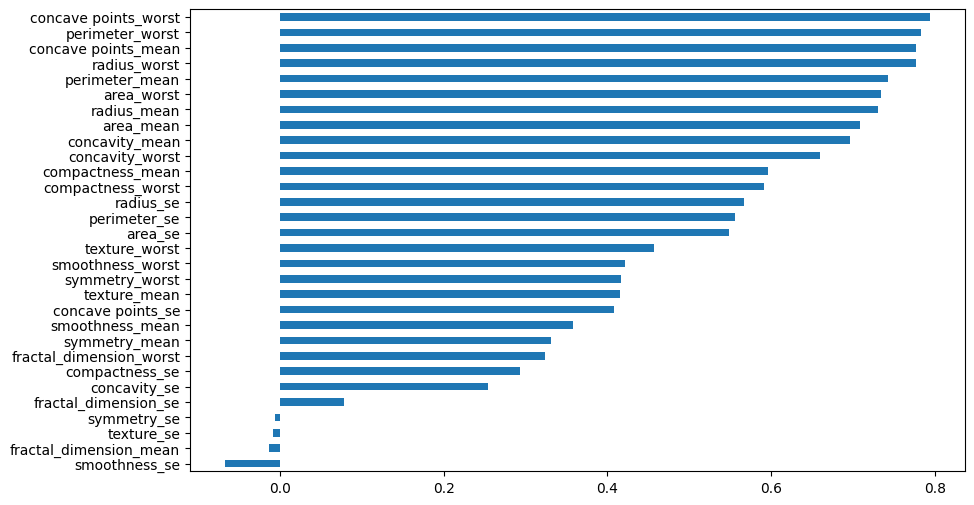

In [62]:
corr_diagnosis = corr['diagnosis']

corr_diagnosis_sorted = corr_diagnosis.sort_values()

corr_diagnosis_sorted = corr_diagnosis_sorted.drop('diagnosis')

fig, ax = plt.subplots(figsize=(10, 6))

corr_diagnosis_sorted.plot(kind='barh', ax=ax)


plt.show()

In [63]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train ,Y_test =train_test_split(X,y, test_size=0.2, random_state=0)

In [65]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train.shape

(455, 30)

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [68]:
Y_pred = knn.predict(X_test)

In [69]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0])

In [70]:
print("\nconfusion matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nf1_score:")
print(f1_score(Y_test, Y_pred))

print("\nRecall:")
print(recall_score(Y_test, Y_pred))

print("\nprecision:")
print(precision_score(Y_test, Y_pred))

print("\nAccuracy:")
print(accuracy_score(Y_test, Y_pred))


confusion matrix:
[[67  0]
 [ 5 42]]

f1_score:
0.9438202247191011

Recall:
0.8936170212765957

precision:
1.0

Accuracy:
0.956140350877193


In [71]:
def initilization_of_population(size, df):
    n_feat = df.shape[1]
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat, dtype=bool)
        chromosome[:int(0.3 * n_feat)] = False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population


def fitness_score(population):
    scores = []
    for chromosome in population:
        selected_features_train = X_train[:, chromosome]
        selected_features_test = X_test[:, chromosome]

        knn.fit(selected_features_train, Y_train)
        predictions = knn.predict(selected_features_test)
        scores.append(accuracy_score(Y_test, predictions))

    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])



def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen


def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


def mutation(pop_after_cross, mutation_rate, n_feat):
    mutation_range = int(mutation_rate * n_feat)
    pop_next_gen = []
    for n in range(len(pop_after_cross)):
        chromo = pop_after_cross[n].copy()  # Make a copy to avoid modifying the original chromosome
        rand_posi = np.random.choice(n_feat - 1, mutation_range, replace=False)  # Generate unique random indices
        for j in rand_posi:
            if j == n_feat - 1:
                chromo[j] = not chromo[j]
            else:
                chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen



def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen = initilization_of_population(size, df)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [72]:
best_chromo, best_score = generations(X, y, size=80, n_feat=df.shape[1], n_parents=64, mutation_rate=0.20, n_gen=100,
                         X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)

Best score in generation 1 : [0.9649122807017544]
Best score in generation 2 : [0.9736842105263158]
Best score in generation 3 : [0.9824561403508771]
Best score in generation 4 : [0.9736842105263158]
Best score in generation 5 : [0.9736842105263158]
Best score in generation 6 : [0.9736842105263158]
Best score in generation 7 : [0.9824561403508771]
Best score in generation 8 : [0.9649122807017544]
Best score in generation 9 : [0.9736842105263158]
Best score in generation 10 : [0.9824561403508771]
Best score in generation 11 : [0.9736842105263158]
Best score in generation 12 : [0.9736842105263158]
Best score in generation 13 : [0.9736842105263158]
Best score in generation 14 : [0.9736842105263158]
Best score in generation 15 : [0.9736842105263158]
Best score in generation 16 : [0.9736842105263158]
Best score in generation 17 : [0.9824561403508771]
Best score in generation 18 : [0.9736842105263158]
Best score in generation 19 : [0.9736842105263158]
Best score in generation 20 : [0.9736842

In [73]:
def chromosome_to_binary(chromosome):
    binary_chromosome = [1 if gene else 0 for gene in chromosome]
    return binary_chromosome

print("Best accuracy:", max(best_score))
index_of_best = best_score.index(max(best_score))
best_accuracy_chromosome = best_chromo[index_of_best]
binary_best_chromo = chromosome_to_binary(best_accuracy_chromosome)
print("Best chromosome:", binary_best_chromo)

Best accuracy: 0.9824561403508771
Best chromosome: [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0]


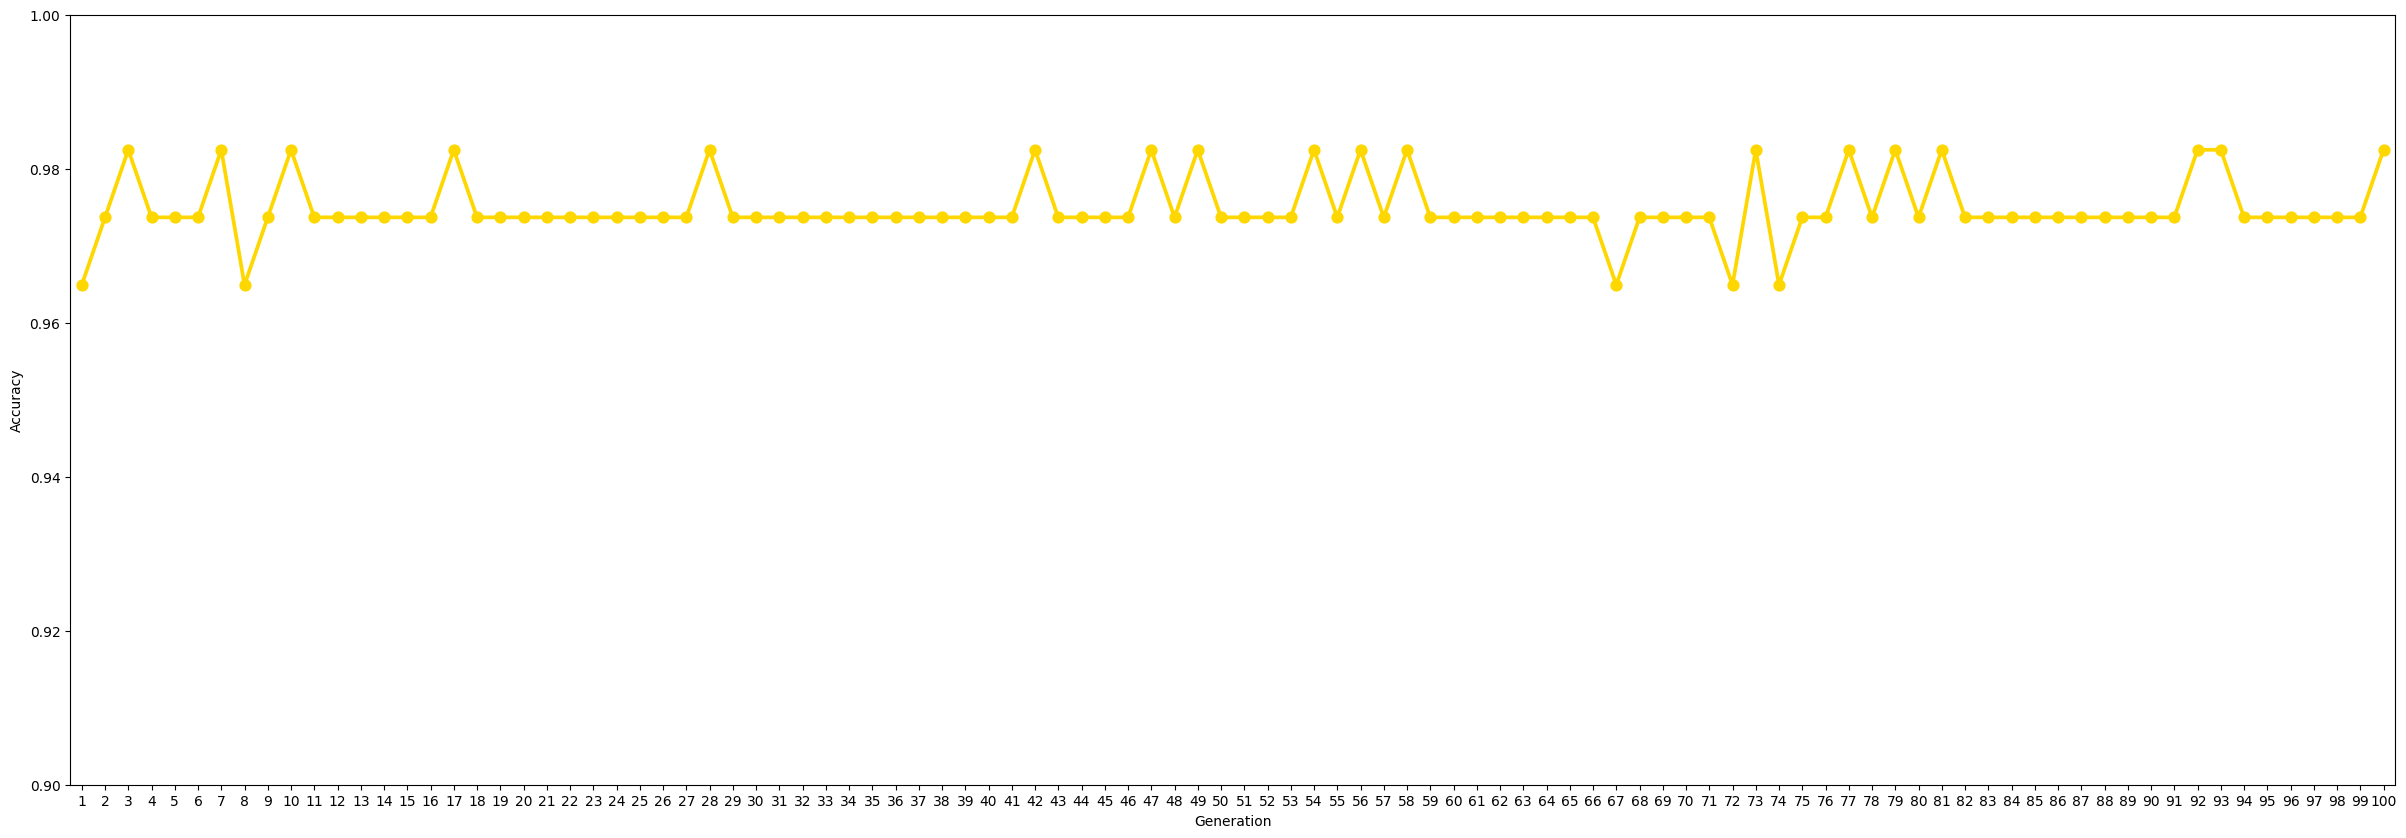

In [74]:
def plot(score,x,y,c = "b"):
    gen = list(range(1, len(score) + 1))
    plt.figure(figsize=(30,10))
    ax = sns.pointplot(x=gen, y=score,color = c )
    ax.set(xlabel="Generation", ylabel="Accuracy")
    ax.set(ylim=(x,y))

plot(best_score, 0.9, 1.0, c="gold")

In [77]:
selected_features = [i for (i, gene) in enumerate(binary_best_chromo) if gene]

# Extract selected features from training and testing data
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train the model
knn.fit(X_train_selected, Y_train)

# Make predictions
Y_pred = knn.predict(X_test_selected)

# Evaluate the model
print("\nConfusion matrix:")
print(confusion_matrix(Y_test, Y_pred))

print("\nF1 score:")
print(f1_score(Y_test, Y_pred))

print("\nRecall:")
print(recall_score(Y_test, Y_pred))

print("\nPrecision:")
print(precision_score(Y_test, Y_pred))

print("\nAccuracy:")
print(accuracy_score(Y_test, Y_pred))


Confusion matrix:
[[67  0]
 [ 2 45]]

F1 score:
0.9782608695652174

Recall:
0.9574468085106383

Precision:
1.0

Accuracy:
0.9824561403508771
